In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Create a histogram of the variable “tripduration” using matplotlib.**

In [2]:


# List of columns you want to read and load into the DataFrame
columns_to_read = ['started_at', 'ended_at']  # Replace with the actual column names

# Read only the specified columns from the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/Merged/Combined_DataWeatherFinal.csv', usecols=columns_to_read)


In [3]:
# Step 1: Convert start_datetime and end_datetime to datetime objects
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

# Step 2: Calculate the time difference between end_datetime and start_datetime
df['trip_duration'] = df['ended_at'] - df['started_at']

# Step 3: Extract the trip duration in the desired format (e.g., seconds, minutes, hours, etc.)

# Calculate trip duration in seconds
df['trip_duration_seconds'] = df['trip_duration'].dt.total_seconds()

# Calculate trip duration in minutes
df['trip_duration_minutes'] = df['trip_duration'].dt.total_seconds() / 60

# Calculate trip duration in hours
df['trip_duration_hours'] = df['trip_duration'].dt.total_seconds() / 3600

# Display the DataFrame with trip duration information
print(df[['started_at', 'ended_at', 'trip_duration', 'trip_duration_seconds', 'trip_duration_minutes', 'trip_duration_hours']])


                  started_at            ended_at   trip_duration  \
0        2022-12-05 17:47:32 2022-12-05 18:13:10 0 days 00:25:38   
1        2022-12-05 15:58:47 2022-12-05 16:02:10 0 days 00:03:23   
2        2022-12-05 07:27:12 2022-12-05 07:34:09 0 days 00:06:57   
3        2022-12-05 15:44:34 2022-12-05 16:13:23 0 days 00:28:49   
4        2022-12-05 18:16:26 2022-12-05 18:28:34 0 days 00:12:08   
...                      ...                 ...             ...   
30689916 2022-07-25 20:32:30 2022-07-25 20:44:12 0 days 00:11:42   
30689917 2022-07-25 09:22:29 2022-07-25 09:34:31 0 days 00:12:02   
30689918 2022-07-25 19:57:47 2022-07-25 20:19:00 0 days 00:21:13   
30689919 2022-07-25 11:54:16 2022-07-25 12:06:42 0 days 00:12:26   
30689920 2022-07-25 08:13:04 2022-07-25 08:58:29 0 days 00:45:25   

          trip_duration_seconds  trip_duration_minutes  trip_duration_hours  
0                        1538.0              25.633333             0.427222  
1                         2

**Create a histogram of the variable “tripduration” using matplotlib.**

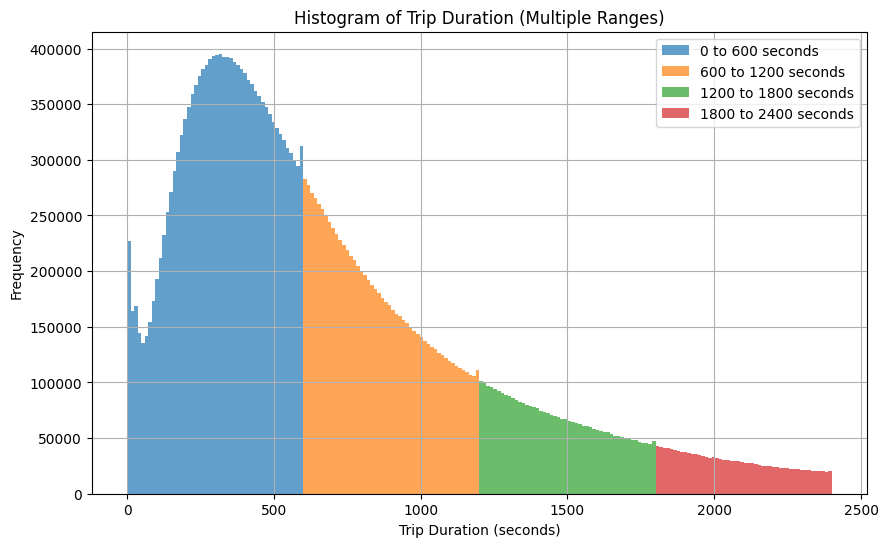

In [5]:
# Define the ranges for trip duration (e.g., 0 to 600, 600 to 1200, 1200 to 1800, and 1800 to 2400 seconds)
ranges = [(0, 600), (600, 1200), (1200, 1800), (1800, 2400)]

# Create the histogram using Matplotlib for each range
plt.figure(figsize=(10, 6))  # Set the size of the figure (width, height)
for range_val in ranges:
    df['tripduration'] = pd.to_timedelta(df['trip_duration']).dt.total_seconds()
    plt.hist(df['tripduration'], bins=50, range=range_val, alpha=0.7)

# Set labels, title, and grid
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Frequency')
plt.title('Histogram of Trip Duration (Multiple Ranges)')
plt.grid(True)

# Show a legend for each range
plt.legend([f'{r[0]} to {r[1]} seconds' for r in ranges])

# Show the histogram with multiple ranges
plt.show()


**Add a curve following the bins—use your research skills to find out how!**

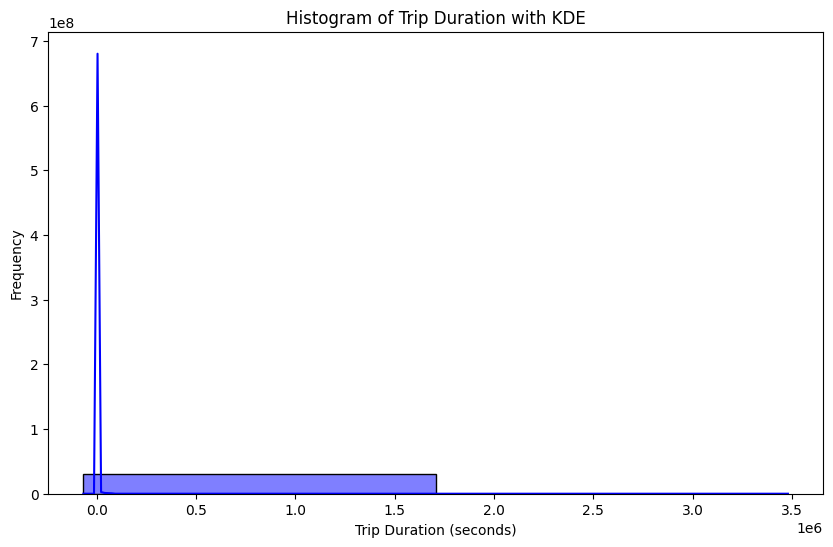

In [6]:
# Step 1: Convert tripduration strings to numerical values (seconds)
df['tripduration'] = pd.to_timedelta(df['trip_duration']).dt.total_seconds()

# Step 2: Create the histogram with KDE
plt.figure(figsize=(10, 6))
sns.histplot(df['tripduration'], bins=2, kde=True, color='blue', edgecolor='black')

plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Frequency')
plt.title('Histogram of Trip Duration with KDE')
plt.show()
